In [2]:
import os
import sys
from pathlib import Path
import concurrent.futures

import h5py
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt

In [12]:
df_data = pd.read_csv("conditioning_data.csv").dropna()

In [59]:
NOISE_THRESH = 650000 #650kW noise threshhold set by Lee Millar
line1_noise_cond = np.array(df_data["1PSI_amp max"]) > NOISE_THRESH
line2_noise_cond = np.array(df_data["2PSI_amp max"]) > NOISE_THRESH
noise_red_cond = np.logical_and(line1_noise_cond, line2_noise_cond)
df_noise_red = df_data.loc[noise_red_cond, :]

zero_cond_pw1 = np.array(df_noise_red["1PSI_amp pulse width"]) != 0 
zero_cond_pw2 = np.array(df_noise_red["2PSI_amp pulse width"]) != 0 
df_zero_rm1 = df_noise_red.loc[zero_cond_pw1, :]
df_zero_rm2 = df_noise_red.loc[zero_cond_pw2, :]

In [67]:
print(df_data.shape)
print(df_noise_red.shape)
print(df_zero_rm1.shape)
print(df_zero_rm2.shape)

vc_psi_pw = df_noise_red["1PSI_amp pulse width"].value_counts()

(29003060, 7)
(15600832, 7)
(19244, 7)
(5619, 7)


In [46]:
HOUR = 3600
ALPHA = 0.002

def norm_tstamp(tstamps, div):
    return (tstamps - np.amin(tstamps))/div

def create_condition_plot(xpts1, xpts2, ypts1, ypts2, labels):

        fig, ax = plt.subplots()
        ax2 = ax.twinx()
        plt.title(labels["title"])

        ax.plot(xpts1, ypts1, marker = ",", linewidth = 0,
                color = labels["color1"], alpha = labels["alpha"])

        ax2.plot(xpts2, ypts2, marker = ",", linewidth = 0,
                color = labels["color2"], alpha = labels["alpha"])

        ax.set_xlabel(labels["xlabel"])
        ax.set_ylabel(labels["ylabel1"])
        ax2.set_ylabel(labels["ylabel2"])
        
        return    

def plt_condtn_uniax(xpts, ypts, labels):
    
    fig, ax = plt.subplots()
    plt.title(labels["title"])
    ax.plot(xpts1, ypts1, marker = ",", linewidth = 0,
                color = labels["color2"], alpha = labels["alpha"])
    ax.set_xlabel(labels["xlabel"])
    ax.set_ylabel(labels["ylabel1"])
    
    return    

In [75]:
label_dict = {
    "title": "Conditioning plot for Line 1 in XBOX3 data",
    "color1": "blue",
    "color2": "green",
    "alpha": ALPHA,
    "xlabel": "Timestamp [hrs]",
    "ylabel1": "Max input power to structure [MW] (blue)",
    "ylabel2": r"Structure input power pulse width [$\mu s$] (green)",
    "savename": "output/condition1_t.png"
    }
tstamps1 = norm_tstamp(df_noise_red["Timestamp"], HOUR)
psi1 = np.array(df_noise_red["1PSI_amp max"])/1e6
tstamps2 = norm_tstamp(df_zero_rm1["Timestamp"], HOUR)
pw1 = np.array(df_zero_rm1["1PSI_amp pulse width"])*1e6

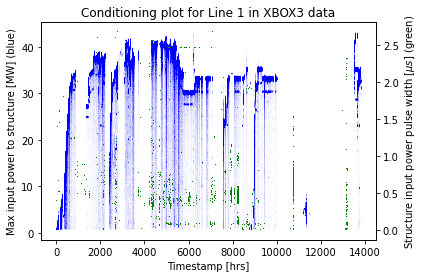

In [76]:
create_condition_plot(tstamps1, tstamps2, psi1, pw1, label_dict)

In [80]:
label_dict = {
    "title": "Conditioning plot for Line 1 in XBOX3 data",
    "color1": "blue",
    "color2": "green",
    "alpha": ALPHA,
    "xlabel": "Pulse Count [Millions]",
    "ylabel1": "Max input power to structure [MW] (blue)",
    "ylabel2": r"Structure input power pulse width [$\mu s$] (green)",
    "savename": "output/condition1_t.png"
    }
pc1 = df_noise_red["Pulse Count 1"]/1e6
psi1 = np.array(df_noise_red["1PSI_amp max"])/1e6
pc_z = df_zero_rm1["Pulse Count 1"]/1e6
pw1 = np.array(df_zero_rm1["1PSI_amp pulse width"])*1e6

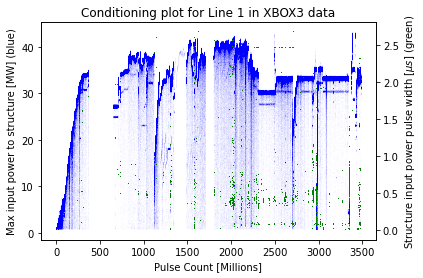

In [81]:
create_condition_plot(pc1, pc_z, psi1, pw1, label_dict)

In [85]:
label_dict = {
    "title": "Conditioning plot for Line 1 in XBOX3 data",
    "color1": "blue",
    "color2": "green",
    "alpha": ALPHA,
    "xlabel": "Pulse Count [Millions]",
    "ylabel1": "Max input power to structure [MW] (blue)",
    "ylabel2": r"Structure input power pulse width [$\mu s$] (green)",
    "savename": "output/condition1_t.png"
    }
pc1 = df_data["Pulse Count 1"]/1e6
psi1 = np.array(df_data["1PSI_amp max"])/1e6
pw1 = np.array(df_data["1PSI_amp pulse width"])*1e6

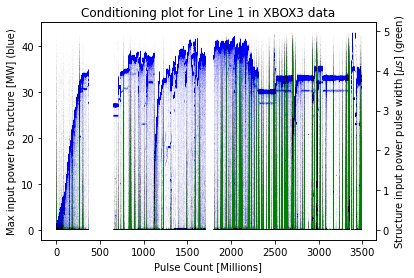

In [89]:
create_condition_plot(pc1, pc1, psi1, pw1, label_dict)

In [9]:
a = np.ones((5,))
print(a.astype("bool"))
a = a*1e-20
print(a.astype("bool"))

[ True  True  True  True  True]
[ True  True  True  True  True]
